# Introducción a OpenCV con Python

En este notebook vamos a aprender las funciones más básicas de OpenCV con Python 2.7. Además, vamos a aprender otras formas de visualización de imágenes utilizando la librería matplotlib.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Leer imágenes

Vamos a comenzar leyendo la imagen en escala de grises peppers_bw.jpg . Para ello vamos a llamar a la función imread con un solo parámetro: el nombre del archivo (o la ruta completa de la imagen)

In [3]:
imagen = cv2.imread('images/peppers_bw.jpg')
#lo que guarda la funcion imread es un array de numpy

print(imagen.shape)


(512, 512, 3)


In [4]:
imagen

array([[[  8,   8,   8],
        [ 10,  10,  10],
        [  7,   7,   7],
        ...,
        [  8,   8,   8],
        [  6,   6,   6],
        [  8,   8,   8]],

       [[  6,   6,   6],
        [ 30,  30,  30],
        [ 52,  52,  52],
        ...,
        [ 77,  77,  77],
        [ 83,  83,  83],
        [ 49,  49,  49]],

       [[ 10,  10,  10],
        [ 54,  54,  54],
        [103, 103, 103],
        ...,
        [151, 151, 151],
        [170, 170, 170],
        [100, 100, 100]],

       ...,

       [[  9,   9,   9],
        [ 60,  60,  60],
        [116, 116, 116],
        ...,
        [187, 187, 187],
        [216, 216, 216],
        [116, 116, 116]],

       [[  6,   6,   6],
        [ 57,  57,  57],
        [111, 111, 111],
        ...,
        [187, 187, 187],
        [201, 201, 201],
        [115, 115, 115]],

       [[  7,   7,   7],
        [ 30,  30,  30],
        [ 56,  56,  56],
        ...,
        [ 86,  86,  86],
        [104, 104, 104],
        [ 60,  60,  60]]

Ahora vamos a analizar algo de información sobre la variable imagen. Observa en primer lugar que la variable de salida de la función imread es un ndarray de numpy. Por tanto, podemos acceder a todas las funciones/parámetros de dicho tipo

In [5]:
print (type(imagen))
print (imagen.dtype)
print (imagen.ndim)
print (imagen.shape)

<class 'numpy.ndarray'>
uint8
3
(512, 512, 3)


Esto que hemos hecho no es lo que realmente queríamos. Observa que, aunque peppers_bw.jpg es una imagen definida en escala de grises, la variable imagen es una hipermatriz de $512\times 512\times 3$ (correspondientes a los 3 componentes de color)

¿Qué ocurre para que una imagen en color se visualice en escala de grises?

In [6]:
imagen = cv2.imread('images/peppers_bw.jpg', 0)
# Equivalente a 
#imagen = cv2.imread('lena.ong', cv2.IMREAD_GRAYSCALE)

In [7]:
print (type(imagen))
print (imagen.dtype)
print (imagen.ndim)
print (imagen.shape)

<class 'numpy.ndarray'>
uint8
2
(512, 512)


Ahora vamos a leer la misma imagen pero en color (y un poco más grande)

In [8]:
imagen_color = cv2.imread('images/peppers.jpg')

In [9]:
print (type(imagen_color))
print (imagen_color.dtype)
print (imagen_color.ndim)
print (imagen_color.shape)

<class 'numpy.ndarray'>
uint8
3
(512, 512, 3)


Vamos a mostrar información acerca de la intensidad más pequeña, más grande y media

In [10]:
print (imagen_color.max())
print (imagen_color.mean())
print (imagen_color.min())

245
105.93921788533528
0


Algo que haremos muy frecuentemente es transformar las imágenes de tipo uint8 [0,255] a formato float [0,1]

In [11]:
imagen_color = np.float32(imagen_color) / 255

In [12]:
print (imagen_color.dtype)
print (imagen_color.ndim)
print (imagen_color.shape)

float32
3
(512, 512, 3)


In [13]:
print (imagen_color.max())
print (imagen_color.mean())
print (imagen_color.min())

0.9607843
0.41544786
0.0


### Visualizar imágenes

In [ ]:
    cv2.imshow('Pimientos bw',imagen)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

: 

In [ ]:
cv2.imshow('Pimientos color',imagen_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

Observa que, al rededor del píxel (50,250), hay una zona con color rojizo (pimiento rojo). Eso significa que la componente roja debería ser bastante alta...Pero recuerda que las coordenadas de color están en BGR

In [14]:
print (imagen_color[50,250,0])
print (imagen_color[50,250,1])
print (imagen_color[50,250,2])

0.15294118
0.1882353
0.7529412


### Escribir imágenes

In [15]:
aleat_gris = np.random.rand(200,200)

In [16]:
cv2.imwrite('images/aleat_gris.png', aleat_gris)

[ WARN:0@121.992] global loadsave.cpp:1063 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


True

Observa el resultado. La imagen es completamente negra. Está interpretando que todo en el intervalo [0,1] es prácticamente negro

In [17]:
aleat_gris = np.uint8(aleat_gris*255)
cv2.imwrite('images/aleat_gris.png', aleat_gris)

True

In [18]:
aleat_color = np.random.rand(200,200,3)
aleat_color = np.uint8(aleat_color * 255)
cv2.imwrite('images/aleat_color.png', aleat_color)

True

### Visualizar imágenes con matplotlib

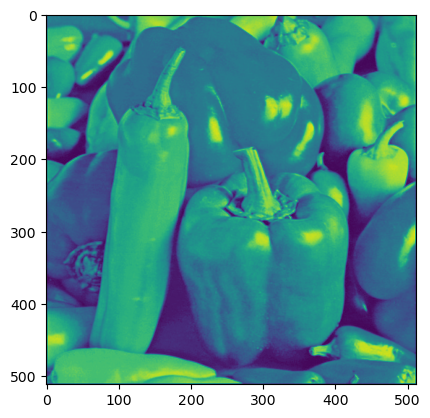

In [19]:
plt.imshow(imagen)

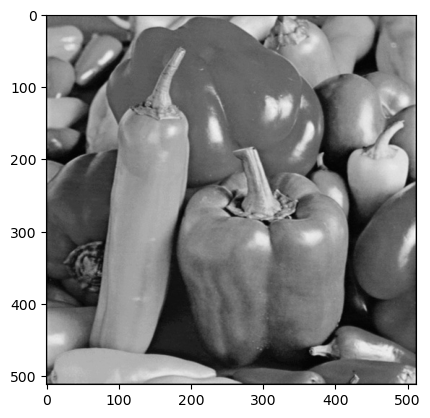

In [20]:
plt.imshow(imagen, cmap = 'gray' )

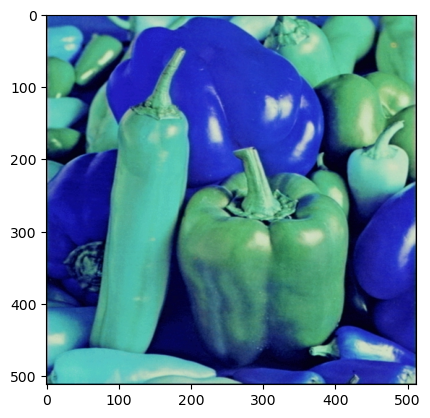

In [21]:
plt.imshow(imagen_color)

In [22]:
imagen_color = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)

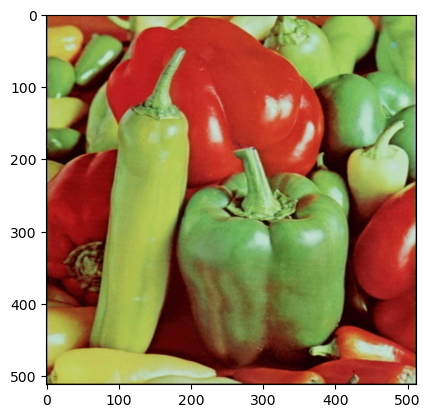

In [23]:
plt.imshow(imagen_color)